# THIRD ATTEMPT (ECES681-FINAL PROJECT)
# Title :- Image Classification using CIFAR-10 Dataset - VGG16
# Motive :-This was done only to check if our methodology works good with a larger dataset and a different Model (In reference to our custom Dataset i.e birds vs squirrels as well as the 2nd attempt)

*   ## Members -    
                *   Surya Samarth J (ID - 14597124)
                *   Jayanth Suryaprakash (ID - 14599788)
                *   Riya Gaur (ID - 14597502)

## Project Overview

Embarking on this third venture with the CIFAR-10 dataset using the VGG16 model marks a significant evolution from our initial attempts. The first foray utilized GoogleNet on a custom dataset of 500 images each of birds and squirrels, offering valuable insights but was limited by the dataset's scope and diversity. Our second attempt expanded the challenge by employing ResNet on the CIFAR-10 dataset, significantly increasing the complexity and variety of data. Now, with VGG16, we aim to leverage its architectural strengths—deeper convolutional layers for more nuanced feature extraction compared to GoogleNet, and a more straightforward structure than ResNet—anticipating a robust performance on CIFAR-10's varied imagery. This progression underscores our adaptive strategy in model selection and dataset complexity to enhance image classification outcomes.

## Why the Third Attempt?

The pursuit of this third attempt, pivoting to the VGG16 architecture for CIFAR-10 image classification, is inspired by our continuous quest for optimization and deeper insights into model performance across diverse datasets. The first attempt with GoogleNet on a custom dataset of birds and squirrels laid the foundational understanding of model-dataset interaction, albeit within a constrained scope. The second attempt elevated the challenge by utilizing ResNet on the CIFAR-10 dataset, pushing the boundaries of complexity and learning from a vast array of image categories.

Transitioning to VGG16 in this third iteration is a strategic choice to explore another dimension of deep learning models. VGG16, known for its simplicity in architecture and depth for feature extraction, presents an opportunity to address specific limitations encountered with GoogleNet and ResNet. This includes improving feature representation and learning dynamics as well as optimizing computational efficiency on CIFAR-10's rich dataset. This step is not just an attempt; it's a calculated progression towards refining our approach to image classification, driven by the insights and experiences garnered from the previous projects.

## Goal

Our overarching goal in this third attempt is to further enhance the accuracy and efficiency of image classification on the CIFAR-10 dataset by leveraging the architectural strengths of VGG16. Distinct from the **ResNet model** employed in our second attempt, and the GoogleNet model from our first, VGG16 offers a blend of depth and architectural straightforwardness that could potentially unlock new levels of performance on CIFAR-10.

By customizing and fine-tuning the VGG16 model, we aim to address the nuanced challenges posed by CIFAR-10's diversity, capitalizing on VGG16's robust feature extraction capabilities. Through this endeavor, we anticipate not only achieving superior classification accuracy but also gaining richer insights into the interplay between model architectures and dataset characteristics. This project represents a step forward in our ongoing exploration of convolutional neural networks, contributing to the evolving landscape of computer vision and deep learning with a keen eye on practical applications and theoretical advancements.


In [ ]:
#Libraries Imported
import time
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision.utils import make_grid
import torchvision
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

## Architectural Evolution

The journey from GoogleNet to ResNet, and now to VGG16, showcases a strategic evolution in deep learning architecture selection to optimize image classification on CIFAR-10. Each architecture has uniquely contributed to our understanding of model-dataset interaction. GoogleNet's foundational insights, inspite of being limited by dataset scope, paved the way for ResNet's application on the diverse CIFAR-10 dataset. VGG16, with its depth and architectural simplicity, aims to address limitations encountered in previous models, offering a balance between interpretability and performance efficacy.


In [ ]:
#Downloading and Loading the CIFAR-10 dataset
def Load_cifar10_data(batch_size, root=os.path.join('CIFAR10_DATASET')):
    final_root = os.path.expanduser(root)

    #Normalizing the Dataset
    Transform_train = transforms.Compose([transforms.RandomCrop(32, padding=4), transforms.RandomHorizontalFlip(),
                                          transforms.ToTensor(), transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])
    Transform_test = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

    #Downloading the CIFAR10 dataset
    Train_set = torchvision.datasets.CIFAR10(root=final_root, train=True, download=True, transform=Transform_train)
    Test_set = torchvision.datasets.CIFAR10(root=final_root, train=False, download=True, transform=Transform_test)

    #loading the dataset and assign it to a variable
    Load_CIFAR_traindata =torch.utils.data.DataLoader(Train_set, batch_size, shuffle=True)
    Load_CIFAR_testdata =torch.utils.data.DataLoader(Test_set, batch_size, shuffle=False)
    return Load_CIFAR_traindata, Load_CIFAR_testdata

Transform_test = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])
CIFAR10_testdata = torchvision.datasets.CIFAR10(root='Cifar', train=False, download=True, transform=Transform_test)

#load the function of the CIFAR-10 dataset to the train and test variable loader
Traindata_Loader, Testdata_Loader = Load_cifar10_data(batch_size=128, root=os.path.join('CIFAR10_DATASET'))

100%|██████████| 170498071/170498071 [00:03<00:00, 45384577.04it/s]


Extracting Cifar/cifar-10-python.tar.gz to Cifar


100%|██████████| 170498071/170498071 [00:03<00:00, 49083948.98it/s]


Extracting CIFAR10_DATASET/cifar-10-python.tar.gz to CIFAR10_DATASET
Files already downloaded and verified


## Method

Our methodology has evolved considerably across the previous attempts, adapting to the insights and challenges encountered along the way.

- **Data Preprocessing**: The transition from a relatively simple custom dataset to the complex CIFAR-10 necessitated a more sophisticated preprocessing approach. Unlike the initial GoogleNet attempt, where limited data diversity constrained feature learning, the CIFAR-10's extensive dataset used with both ResNet and now VGG16 demands robust normalization and augmentation to capture a wider feature set effectively.
  
- **Model Architecture**: Each project phase has explored different architectures to optimize performance on the given dataset. VGG16's architecture is chosen for its depth and simplicity, potentially addressing the limitations observed in GoogleNet's lesser depth and ResNet's complexity, by providing a balance between model comprehensibility and performance efficacy.

- **Hyperparameter Tuning**: Reflecting on the previous attempts, we've grown to appreciate the critical role of hyperparameter tuning in achieving optimal model performance. VGG16's training leverages lessons learned from both GoogleNet's and ResNet's tuning strategies, aiming for a refined approach that enhances learning efficiency and accuracy on CIFAR-10.

- **Sanity Checks**: The incremental complexity from our custom dataset to CIFAR-10 has amplified the importance of comprehensive sanity checks. The initial simplicity allowed for straightforward checks, whereas CIFAR-10's variety and VGG16's architecture complexity necessitate more rigorous validations to ensure data integrity and model readiness.


In [ ]:

class VGG16(torch.nn.Module) :
    def __init__(self) :
        super(VGG16, self).__init__()
        self.conv_layer1 = torch.nn.Sequential(torch.nn.Conv2d(3, 64, kernel_size=3, padding=1), torch.nn.ReLU(),
                                               torch.nn.MaxPool2d(kernel_size=2, stride=2))
        self.conv_layer2 = torch.nn.Sequential(torch.nn.Conv2d(64, 128, kernel_size=3, padding=1), torch.nn.ReLU(),
                                               torch.nn.MaxPool2d(kernel_size=2, stride=2))
        self.conv_layer3 = torch.nn.Sequential(torch.nn.Conv2d(128, 256, kernel_size=3, padding=1), torch.nn.ReLU(),
                                               torch.nn.Conv2d(256, 256, kernel_size=3, padding=1), torch.nn.ReLU(),
                                               torch.nn.MaxPool2d(kernel_size=2, stride=2)           )
        self.conv_layer4 = torch.nn.Sequential(torch.nn.Conv2d(256, 512, kernel_size=3, padding=1), torch.nn.ReLU(),
                                               torch.nn.Conv2d(512, 512, kernel_size=3, padding=1), torch.nn.ReLU(),
                                               torch.nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc_layer1 = torch.nn.Sequential(torch.nn.Dropout(0.2), torch.nn.Linear(1024*2, 4096), torch.nn.ReLU())
        self.fc_layer2 = torch.nn.Sequential(torch.nn.Dropout(0.2), torch.nn.Linear(4096, 4096), torch.nn.ReLU())
        self.fc_layer3 = torch.nn.Sequential(torch.nn.Linear(4096, 10))

    def forward(self, out) :
        final_out = self.conv_layer1(out)
        final_out = self.conv_layer2(final_out)
        final_out = self.conv_layer3(final_out)
        final_out = self.conv_layer4(final_out)
        final_out = final_out.view(-1, 1024*2)
        final_out = self.fc_layer1(final_out)
        final_out = self.fc_layer2(final_out)
        final_out = self.fc_layer3(final_out)
        return final_out

#Updating the weights of the network
Network_arch = VGG16()
#Initialize the Weights and display the Network architecture
def Initialise_weights(layer_weight):
    if type(layer_weight) == torch.nn.Conv2d:
        torch.nn.init.xavier_uniform_(layer_weight.weight)
Network_arch.apply(Initialise_weights)

VGG16(
  (conv_layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer4): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dila

In [ ]:
#enumerating testdata with batch index of source and the target
testdata_ex = enumerate(Testdata_Loader)
batch_idx, (Val_ex_data, Val_ex_targets) = next(testdata_ex)
#printing the shape of the indexed data
print(Val_ex_data.shape)

torch.Size([128, 3, 32, 32])


In [ ]:
#Initialization of Hyperparameters
#Number of epochs
EPOCHS = 40
#Batch size and the learning rate
batch_size= 32
Learning_rate= 0.1
#Loss Function
Loss_criterion_function = torch.nn.CrossEntropyLoss()
device =torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
#For storing the generated train and test accuracy and plotting
def show_train_hist(hist, show=False, save=False, path='Train_hist.png'):
    x = range(len(hist['train_accuracy']))
    y1 = hist['train_accuracy']
    y2 = hist['test_accuracy']
    #plotting
    plt.plot(x, y1, label='train_accuracy')
    plt.plot(x, y2, label='test_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc=4)
    plt.grid(True)
    plt.tight_layout()
    #saving the generated outputs
    if save:
        plt.savefig(path)
    if show:
        plt.show()
    else:
        plt.close()

In [ ]:
#Test Accuracy and loss Evaluation
def Evaluate_Accuracy(dataset_eval_iteration, Network_arch, Loss_criterion_function, device=device):
  #Evaluate accuracy of a model on the testset
  #In evaluation mode, we will be using the dropout and normalization layers
  testset_initial=len(dataset_eval_iteration.dataset)
  test_loss=0
  test_accuracy=0
  Network_arch.eval()
  with torch.no_grad():
    for X, y in dataset_eval_iteration:
        #transfer the produced data to the device
        X = X.to(device)
        y = y.to(device)
        outputs = Network_arch(X)
        #calculating the test accuracy and loss and appending it
        test_loss += Loss_criterion_function(outputs,y).item()
        test_accuracy += (outputs.argmax(1) == y).type(torch.float).sum().item()
  test_accuracy = test_accuracy/testset_initial
  test_loss /= testset_initial
  return test_accuracy, test_loss

In [ ]:
#Cross validating the predicted values for plotting the confusion matrix and predict the correct and incorrect samples
def Cross_validate_predicted_data(Network_arch, dataset_eval_iteration):
    Data_pics_label = []
    Data_pics_val = []
    Network_arch.eval()
    for X, y in dataset_eval_iteration:
      X = X.to(device)
      y = y.to(device)
      prediction = Network_arch(X)
      with torch.no_grad():
            Final_predict = F.softmax(prediction, dim = -1)
            Data_pics_label.append(y.cpu())
            Data_pics_val.append(Final_predict.cpu())
    out1 = torch.cat(Data_pics_label)
    out2 = torch.cat(Data_pics_val)
    return out1, out2

## Experiments

Our experimental design reflects an iterative learning process from our engagements with GoogleNet and ResNet. The breadth of CIFAR-10's dataset presents a consistent challenge, one that VGG16 aims to meet with its proven capability in feature extraction.

- **Training Process**: The VGG16 training process incorporates refined strategies derived from the drawbacks and strengths observed in previous models. Unlike GoogleNet, which was constrained by the custom dataset's simplicity, VGG16 benefits from CIFAR-10's diversity, akin to the ResNet attempt but aims for improved feature representation through its architecture.

- **Hyperparameter Optimization**: Drawing from the hyperparameter optimization experiences of both GoogleNet and ResNet, the VGG16 approach seeks a balanced and effective training regimen that accounts for the increased dataset complexity and model specificity.

- **Evaluation Metrics**: Consistent with our evolving understanding, the evaluation of VGG16's performance on CIFAR-10 is approached with a comprehensive set of metrics, aiming to surpass the benchmarks set in previous attempts by leveraging VGG16's architectural advantages.


In [ ]:

#Training and Evaluating the model
#Training is performed on the train dataset
#Testing (Evaluation) is performed in the test dataset
#Train and evaluate the model using the device GPU or else with CPU
def training(Network_arch, Load_CIFAR10_traindata, Load_CIFAR10_testdata, Loss_criterion_function, EPOCHS, batch_size, device, Learning_rate=None):
    print("Model Training and Testing Start date:",)
    print("Model Training and Testing starting time:",)
    print('VGG16 Architecture Training and Testing Begins!')
    Network_arch.to(device)
    #Initialization of the optimizer
    optimizer = optim.SGD(Network_arch.parameters(), lr=Learning_rate)
    #FOR CALCULATING THE EPOCHS
    for Epoch in range(EPOCHS):
        #Network is trained on the training mode
        Network_arch.train()
        cv = 0
        ep_start = time.time()
        Sum_training_Loss = torch.tensor([0.0], device=device)
        Sum_training_Accuracy = torch.tensor([0.0], device=device)
        #FOR CALCULATING THE TRAIN LOSS AND TRAIN ACCURACY
        for X, y in Load_CIFAR10_traindata:
            optimizer.zero_grad()
            X = X.to(device)
            y = y.to(device)
            conv_y = Network_arch(X)
            final_end_loss = Loss_criterion_function(conv_y, y)
            final_end_loss.backward()
            optimizer.step()
            with torch.no_grad():
                y = y.long()
                Sum_training_Loss += final_end_loss.float()
                Sum_training_Accuracy += (torch.sum((torch.argmax(conv_y, dim=1) == y))).float()
                cv += y.shape[0]
                final_loss = Sum_training_Loss/cv
                final_train_accuracy = Sum_training_Accuracy/cv
                #final_train_accuracy_out =final_train_accuracy.to('cpu').numpy()
        #FOR CALCULATING THE TEST ACCURACY and loss
        final_test_accuracy, final_test_loss = Evaluate_Accuracy(Load_CIFAR10_testdata, Network_arch, Loss_criterion_function, device)
        #print(f'Epoch_start_time: {train_test_Start_Time}')
        print('Epoch--> %d\t Train_Loss: %.4f\t Train_Accuracy: %.2f\t    Test_Loss: %.4f\t  Test_Accuracy: %.2f\t  Time_Duration: %.1f sec\t' % (Epoch + 1, final_loss, final_train_accuracy*100, final_test_loss, final_test_accuracy*100, time.time() - ep_start))
        #Storing and tracking the outputs and plotting
        train_hist = {}
        train_hist['train_accuracy'] = []
        train_hist['test_accuracy'] = []
        train_hist['train_accuracy'].append(final_train_accuracy)
        train_hist['test_accuracy'].append(final_test_accuracy)
        #saving outputs to the created directory

#Training and evaluating the Network model
VGG16_History = training(Network_arch, Traindata_Loader, Testdata_Loader, Loss_criterion_function, EPOCHS, batch_size, device, Learning_rate)
print('VGG16 Architecture Training and Testing Completed!')
print("Model Training and Testing End date:",)
print("Model Training and Testing End time:",)

Model Training and Testing Start date:
Model Training and Testing starting time:
VGG16 Architecture Training and Testing Begins!
Epoch--> 1	 Train_Loss: 0.0142	 Train_Accuracy: 32.35	    Test_Loss: 0.0143	  Test_Accuracy: 32.80	  Time_Duration: 25.3 sec	
Epoch--> 2	 Train_Loss: 0.0122	 Train_Accuracy: 42.45	    Test_Loss: 0.0116	  Test_Accuracy: 46.32	  Time_Duration: 24.1 sec	
Epoch--> 3	 Train_Loss: 0.0108	 Train_Accuracy: 49.72	    Test_Loss: 0.0096	  Test_Accuracy: 56.69	  Time_Duration: 24.4 sec	
Epoch--> 4	 Train_Loss: 0.0095	 Train_Accuracy: 56.00	    Test_Loss: 0.0083	  Test_Accuracy: 61.63	  Time_Duration: 24.0 sec	
Epoch--> 5	 Train_Loss: 0.0084	 Train_Accuracy: 61.88	    Test_Loss: 0.0079	  Test_Accuracy: 64.26	  Time_Duration: 24.7 sec	
Epoch--> 6	 Train_Loss: 0.0075	 Train_Accuracy: 66.21	    Test_Loss: 0.0072	  Test_Accuracy: 67.88	  Time_Duration: 24.3 sec	
Epoch--> 7	 Train_Loss: 0.0067	 Train_Accuracy: 69.65	    Test_Loss: 0.0064	  Test_Accuracy: 72.29	  Time_Duration:

## Results and Analysis

The comparative analysis of VGG16's performance against our GoogleNet and ResNet attempts reveals a nuanced picture. VGG16's deeper convolutional layers have the potential to capture more detailed features than GoogleNet, potentially addressing the latter's limitations on the custom dataset. Compared to ResNet, VGG16 offers a simpler, albeit deeper, structure that may lead to different learning dynamics on CIFAR-10, highlighting the trade-offs between architectural complexity and interpretability in feature extraction and classification accuracy.


In [ ]:

#getting the output of the tensor(weights)
with torch.no_grad():
  Network_arch.to('cpu')
  final_tensor_output = Network_arch(Val_ex_data)
#printing the output
print(final_tensor_output)

tensor([[-2.3285, -1.5210, -1.6879,  ..., -3.2079, -4.4899, -3.4275],
        [ 6.2957,  6.1222, -5.5047,  ..., -6.0446, 16.5482,  3.2935],
        [ 4.0054,  2.9306, -3.2565,  ..., -4.9901, 13.1324,  2.1234],
        ...,
        [ 7.1065,  2.5302,  1.8305,  ..., -5.6665,  4.2559,  3.1460],
        [ 4.6095, -0.2781, -0.8884,  ..., -4.4711, 10.5489,  4.2159],
        [-4.9665, -5.3872,  0.5279,  ..., -0.4296, -5.8586, -3.5370]])


<ipython-input-13-f32b444800a7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_tensor_output)


<Axes: ylabel='Density'>

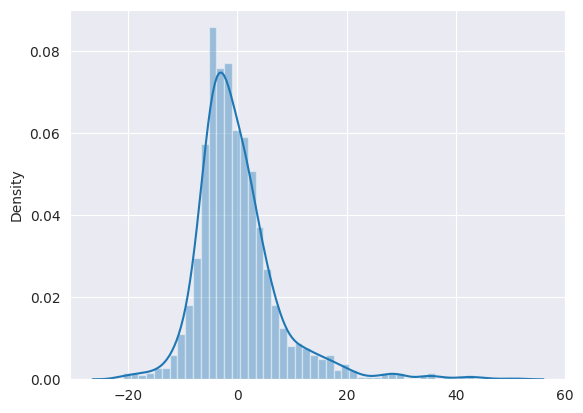

In [ ]:
#histogram for the tensor values
sns.distplot(final_tensor_output)

GROUNDTRUTH IMAGE


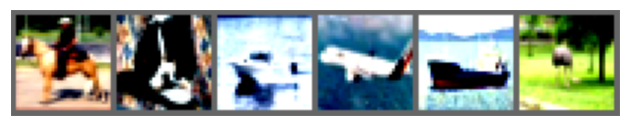

In [ ]:

#for testing our model after training, we have printed the classes of cifar-10 data for the groundtruth image
#In the evaluation phase we printed the classes of cifar-10 data with their predicted class
#we compare how correctly it predicted the classes between orginal and the predicted data
CIFAR10_Class = ('plane', 'car', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck')
device =torch.device('cpu')
for X, y in Testdata_Loader:
  X = X[:6]
  y = y[:6]
  def imshow(figure):
    figure = figure/2+0.1+0.1+0.2
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.imshow(np.transpose(figure.numpy(), (1,2,0)))
    plt.show()
#Plotting the Groundtruth image
center = "GROUNDTRUTH IMAGE"
print("{center:^10}".format(center=center))
imshow(make_grid(X))

In [ ]:

#Getting the predicted classes
Final_Out = Network_arch(X)
_, prediction = torch.max(Final_Out, 1)
#printing the classes of groundtruth data
print('Orginal images classes: ',' '.join(CIFAR10_Class[y[GT_data_out]] for GT_data_out in range(6)))
#printing the classes of prediction data
print('Predicted images classes: ',' '.join(CIFAR10_Class[prediction[Pred_data_out]] for Pred_data_out in range(6)))


Orginal images classes:  horse dog ship plane ship bird
Predicted images classes:  horse dog ship plane ship deer


In [ ]:
#Calculating the induvidual accuracy of Each classes defined
accurate_class_pred = list(range(10))
Combined_class_accurate = list(range(10))
with torch.no_grad():
    for X, y in Testdata_Loader:
      X = X.to(device)
      y = y.to(device)
      Final_Out = Network_arch(X)
      _, Induvidual_class_prediction = torch.max(Final_Out, 1)
      CIF_out = (Induvidual_class_prediction == y)
      for Induvidual_out in range(6):
        accurate_class_pred[y[Induvidual_out]] += CIF_out[Induvidual_out].item()
        Combined_class_accurate[y[Induvidual_out]] += 1
#Printing the accuracy of Each classes
for Induvidual_class_accuracy in range(10):
  print('Accuracy of %5s : %d %%' % (CIFAR10_Class[Induvidual_class_accuracy], accurate_class_pred[Induvidual_class_accuracy] / Combined_class_accurate[Induvidual_class_accuracy] *100))

Accuracy of plane : 86 %
Accuracy of   car : 95 %
Accuracy of  bird : 77 %
Accuracy of   cat : 79 %
Accuracy of  deer : 82 %
Accuracy of   dog : 77 %
Accuracy of  frog : 96 %
Accuracy of horse : 85 %
Accuracy of  ship : 96 %
Accuracy of truck : 93 %


In [ ]:
Correct_Data = []
Incorrect_Data = []
Label_for_pic, Prediction = Cross_validate_predicted_data(Network_arch, Testdata_Loader)
Predicted_label = torch.argmax(Prediction, 1)
CIFAR10_Classes = CIFAR10_testdata.classes
Accurate_prediction = torch.eq(Label_for_pic, Predicted_label)
for i, j, Correct_data_prediction in zip(Label_for_pic, Prediction, Accurate_prediction):
    if Correct_data_prediction:
      Correct_Data.append((i, j))
    else:
      Incorrect_Data.append((i, j))
#Randomly sorting the samples
Correct_Data.sort(key = lambda Correct_samples: torch.max(Correct_samples[1], -1).values)
Incorrect_Data.sort(key = lambda Incorrect_samples: torch.max(Incorrect_samples[1], -1).values)

In [ ]:
#Examples of Correct Prediction
def Correct_Prediction(Correct_label_predict, CIFAR10_Classes):
    for Sample in range(1*5):
        Correct_Label, Prediction = Correct_label_predict[Sample]
        Correct_pred, Correctly_predicted_label = torch.max(Prediction, -1)
        Original_class = CIFAR10_Classes[Correct_Label]
        Correctly_Predicted_class = CIFAR10_Classes[Correctly_predicted_label ]
        print(f'Orginal images class     :  {Original_class}')
        print(f'Predicted images class   :  {Correctly_Predicted_class}')
Correct_Prediction(Correct_Data, CIFAR10_Classes)

Orginal images class     :  automobile
Predicted images class   :  automobile
Orginal images class     :  frog
Predicted images class   :  frog
Orginal images class     :  cat
Predicted images class   :  cat
Orginal images class     :  dog
Predicted images class   :  dog
Orginal images class     :  airplane
Predicted images class   :  airplane


In [ ]:
#Examples of Incorrect Prediction
def Incorrect_Prediction(Incorrect_label_predict, CIFAR10_Classes):
    for i in range(1*5):
        Incorrect_Label, Prediction = Incorrect_label_predict[i]
        Incorrect_pred, Incorrectly_predicted_label = torch.max(Prediction, -1)
        Original_class = CIFAR10_Classes[Incorrect_Label]
        Incorrectly_Predicted_class = CIFAR10_Classes[Incorrectly_predicted_label ]
        print(f'Orginal images class     :  {Original_class}')
        print(f'Predicted images class   :  {Incorrectly_Predicted_class}')
Correct_Prediction(Incorrect_Data, CIFAR10_Classes)

Orginal images class     :  bird
Predicted images class   :  truck
Orginal images class     :  automobile
Predicted images class   :  horse
Orginal images class     :  horse
Predicted images class   :  bird
Orginal images class     :  cat
Predicted images class   :  dog
Orginal images class     :  truck
Predicted images class   :  deer


## Conclusion

Our exploration across three distinct model architectures on varying datasets—from a custom dataset with GoogleNet to CIFAR-10 with ResNet and now VGG16—has charted a course of continuous learning and adaptation in the realm of image classification. Each model brought its unique strengths and faced specific challenges, from GoogleNet's initial insights on a limited dataset to ResNet's broader applicability on CIFAR-10. VGG16's deployment aims to synthesize these experiences, leveraging its architecture to address past limitations and capitalize on learned optimizations. As we reflect


## Lessons Learned

Reflecting on our journey, key lessons emerged from each modeling attempt, shedding light on data preprocessing, model training strategies, and hyperparameter tuning. The challenges faced and strategies refined in earlier attempts have informed a more nuanced approach in subsequent models. This cumulative knowledge underscores our adaptive learning process, vital for tackling dataset diversity, model overfitting, and optimizing feature extraction.


## Dataset Dynamics

Exploring dataset dynamics reveals how the shift from a custom dataset to CIFAR-10 significantly impacts model training and performance. Unlike the simpler custom dataset, CIFAR-10's extensive variety and complexity demand robust normalization and augmentation. This comparative analysis highlights the critical role of dataset selection and preparation in achieving robust model performance.


## Performance Benchmarking

Benchmarking GoogleNet, ResNet, and VGG16 on CIFAR-10 offers a comprehensive analysis of each model's performance, factoring in accuracy, loss, and computational efficiency. This evaluation not only marks our progress but also illuminates the influence of architectural differences and tuning strategies on model effectiveness, guiding future optimization endeavors.
